In [ ]:
# Some unique feartures to make the project more intractive

In [1]:
import numpy as np # for handling missing data
import pandas as pd # for data manipulation and cleaning
import matplotlib.pyplot as plt # for plotting data records
import seaborn as sns # for advanced visualization

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\yashr\Downloads\india_crime_data_5000_inconsistent.csv")

In [3]:
# View first few rows
df.head(3)

,Crime_ID,Crime_Type,City,Date_of_Occurrence,Time_of_Occurrence,Severity_Level,Latitude,Longitude,Reporting_Channel,Weather_Condition,Day_of_Week,Number_of_Witnesses,Injuries_Report,Arrests_Made,Suspect_Identified,Response_Time (minutes),Offender_Age_Group,Temperature (°C),Festival/Season,Victim_Occupation
0,a6c7b480-509e-4325-9aad-6b51cfa92ed9,Burglary,Kolkata,2023-12-31,20:27:11,High,36.506183,87.691877,Anonymous Tip,Cloudy,Friday,10,Yes,Yes,No,18,Juvenile,16.0,Holi,Teacher
1,1da5fd94-c182-4881-9cff-b32f0f3e29c5,Cybercrime,Lucknow,2024-12-06,20:01:51,Medium,25.078044,82.616198,Helpline,Stormy,Friday,5,No,Yes,Yes,5,26-40,35.0,Christmas,Student
2,46ff2bd0-9582-4eea-a528-d82187743021,Vandalism,Lucknow,2020-04-28,19:07:04,Low,11.338849,84.648488,Online,Clear,Wednesday,4,Yes,No,No,18,26-40,23.0,Pongal,Business


In [ ]:
# 1. Real-Time Crime Severity Alert System

In [4]:
# Assign weights (tune based on domain knowledge)
def calculate_severity(row):
    severity_map = {'Low': 1, 'Medium': 2, 'High': 3}
    festival_risk = 2 if row['Festival/Season'] in ['Diwali', 'Holi'] else 0
    weather_risk = 1 if row['Weather_Condition'] in ['Rainy', 'Storm'] else 0
    return severity_map.get(row['Severity_Level'], 0) + festival_risk + weather_risk

df['Crime_Severity_Score'] = df.apply(calculate_severity, axis=1)

In [6]:
df.head(3)

,Crime_ID,Crime_Type,City,Date_of_Occurrence,Time_of_Occurrence,Severity_Level,Latitude,Longitude,Reporting_Channel,Weather_Condition,...,Number_of_Witnesses,Injuries_Report,Arrests_Made,Suspect_Identified,Response_Time (minutes),Offender_Age_Group,Temperature (°C),Festival/Season,Victim_Occupation,Crime_Severity_Score
0,a6c7b480-509e-4325-9aad-6b51cfa92ed9,Burglary,Kolkata,2023-12-31,20:27:11,High,36.506183,87.691877,Anonymous Tip,Cloudy,...,10,Yes,Yes,No,18,Juvenile,16.0,Holi,Teacher,5
1,1da5fd94-c182-4881-9cff-b32f0f3e29c5,Cybercrime,Lucknow,2024-12-06,20:01:51,Medium,25.078044,82.616198,Helpline,Stormy,...,5,No,Yes,Yes,5,26-40,35.0,Christmas,Student,2
2,46ff2bd0-9582-4eea-a528-d82187743021,Vandalism,Lucknow,2020-04-28,19:07:04,Low,11.338849,84.648488,Online,Clear,...,4,Yes,No,No,18,26-40,23.0,Pongal,Business,1


In [ ]:
# Bonus Visualization:

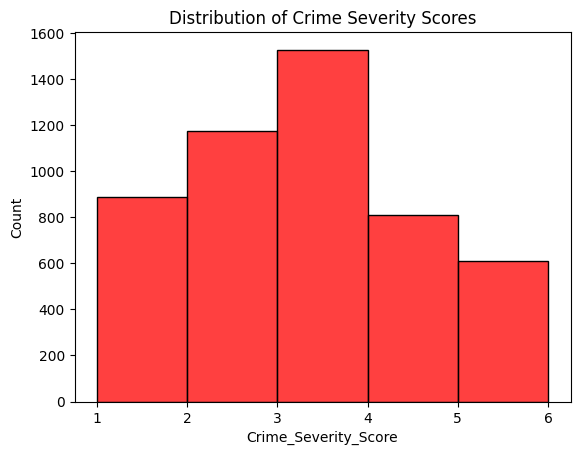

In [7]:
sns.histplot(df['Crime_Severity_Score'], bins=5, color='red')
plt.title("Distribution of Crime Severity Scores")
plt.show()

In [ ]:
# 2. Crime Type Classification Model

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target
df_clean = df.dropna(subset=['Crime_Type'])
label_encoder = LabelEncoder()
df_clean['Crime_Label'] = label_encoder.fit_transform(df_clean['Crime_Type'])

# One-hot encode features
X = pd.get_dummies(df_clean.drop(['Crime_Type', 'Crime_Label'], axis=1))
y = df_clean['Crime_Label']

# Train-test split and model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_crime = RandomForestClassifier().fit(X_train, y_train)

# Predict
predictions = model_crime.predict(X_test)

In [9]:
predictions

array([ 5, 13,  4, ...,  7,  2,  6], shape=(1002,))

In [ ]:
# 3. Geo-Clustering of Crime Hotspots

In [12]:
# 📦 Required Libraries
import pandas as pd
from sklearn.cluster import KMeans
import folium
from folium import CircleMarker
from folium.plugins import MarkerCluster
from IPython.display import IFrame

# ✅ 1. Extract coordinates (remove NaNs)
coords = df[['Latitude', 'Longitude']].dropna()

# ✅ 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(coords)

# ✅ 3. Add cluster labels back to the original dataframe
df.loc[coords.index, 'Cluster'] = kmeans.labels_

# ✅ 4. Define color map for 5 clusters
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange']

# ✅ 5. Create base Folium map
map_cluster = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# ✅ 6. Add colored markers by cluster
for idx, row in df.loc[coords.index].iterrows():
    CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color=cluster_colors[int(row['Cluster'])],
        fill=True,
        fill_opacity=0.6
    ).add_to(map_cluster)

# ✅ 7. Save map to HTML
map_path = "clustered_crimes.html"
map_cluster.save(map_path)

# ✅ 8. Display map inside Jupyter Notebook
IFrame(map_path, width=800, height=500)

In [ ]:
#4. Crime Description NLP (If Text Exists)

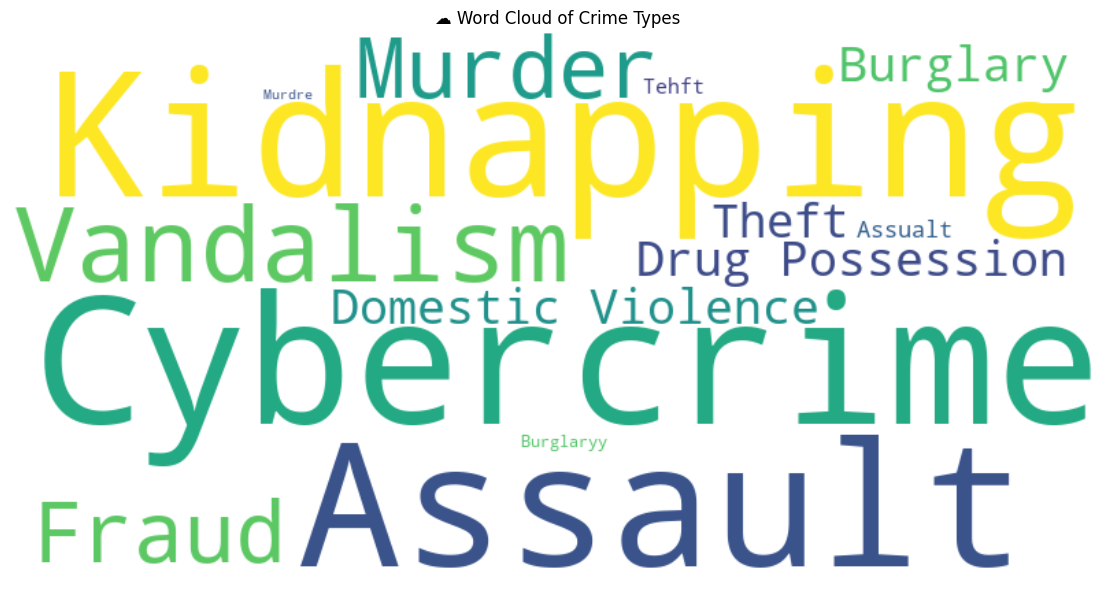

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine repeated crime types into a single string
text_data = ' '.join(df['Crime_Type'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Word Cloud of Crime Types")
plt.tight_layout()
plt.show()

In [ ]:
# 5. Time Series Forecasting (Crime Count)from fbprophet import Prophet

19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing


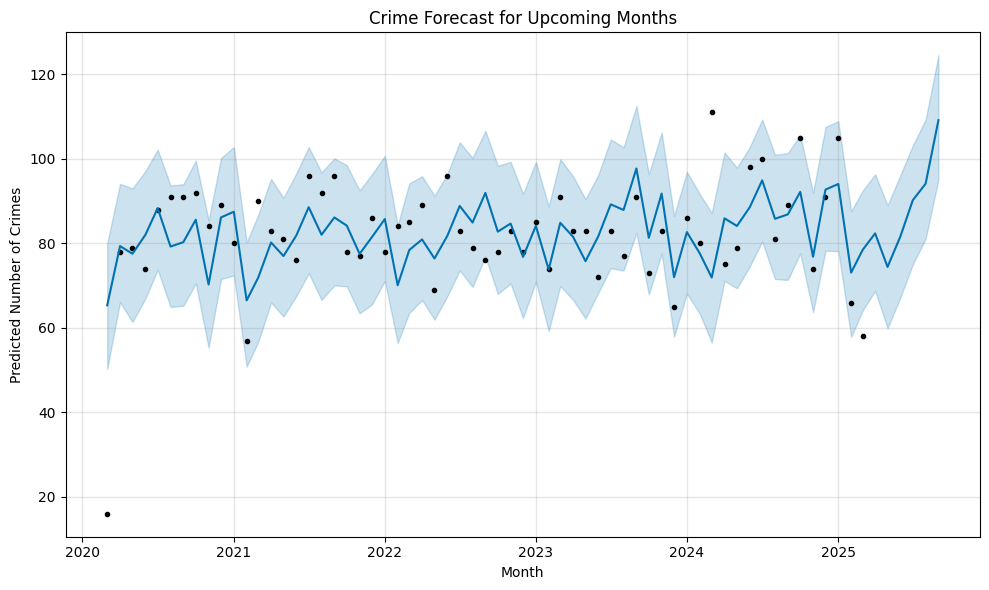

In [31]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data
df['Month'] = pd.to_datetime(df['Date_of_Occurrence'], errors='coerce').dt.to_period('M').dt.to_timestamp()
ts = df.groupby('Month').size().reset_index(name='Crimes')
ts.columns = ['ds', 'y']

# Fit Prophet model
model = Prophet()
model.fit(ts)

# Forecast 6 future months
future = model.make_future_dataframe(periods=6, freq='ME')
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Crime Forecast for Upcoming Months")
plt.xlabel("Month")
plt.ylabel("Predicted Number of Crimes")
plt.tight_layout()
plt.show()

In [ ]:
# 6. Law Enforcement Resource Recommender

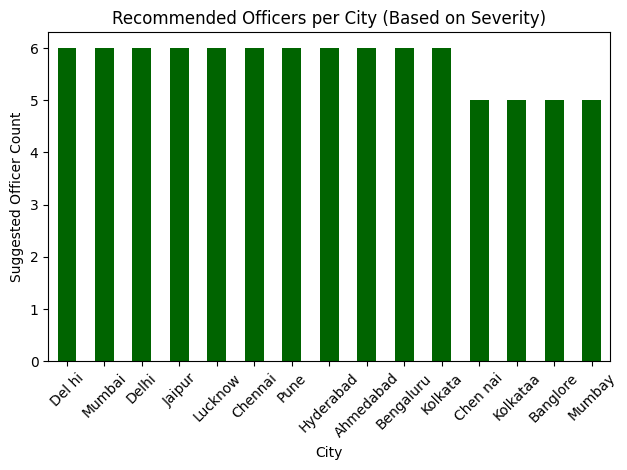

In [21]:
zone_counts = df.groupby('City')['Crime_Severity_Score'].mean().sort_values(ascending=False)
officer_alloc = zone_counts.apply(lambda x: int(round(x * 2)))  # Scale factor

officer_alloc.plot(kind='bar', color='darkgreen')
plt.title("Recommended Officers per City (Based on Severity)")
plt.ylabel("Suggested Officer Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#7. Anomaly Detection with Isolation Forest

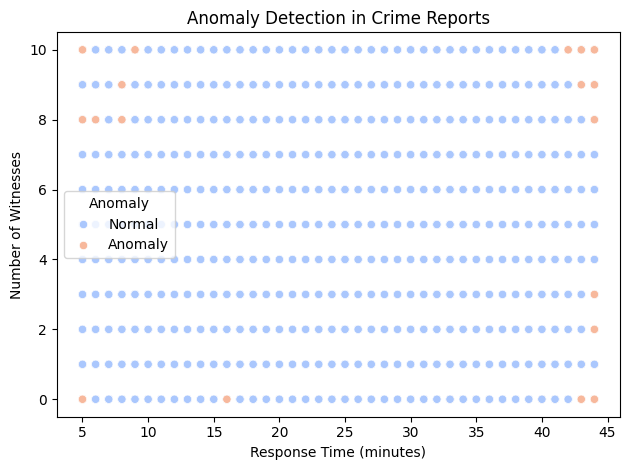

In [32]:
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

# Select rows with complete data
numerical = df[['Response_Time (minutes)', 'Number_of_Witnesses', 'Temperature (°C)']].dropna()

# Fit Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)
anomalies = clf.fit_predict(numerical)

# Create a new column for anomalies and assign only to valid rows
df['Anomaly'] = None
df.loc[numerical.index, 'Anomaly'] = anomalies

# Optional: Convert to readable labels
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Plot the results
sns.scatterplot(data=df.loc[numerical.index], 
                x='Response_Time (minutes)', 
                y='Number_of_Witnesses', 
                hue='Anomaly', 
                palette='coolwarm')

plt.title("Anomaly Detection in Crime Reports")
plt.xlabel("Response Time (minutes)")
plt.ylabel("Number of Witnesses")
plt.tight_layout()
plt.show()


In [ ]:
#  8. Crime Seasonality Trend Analysis (Decomposition)

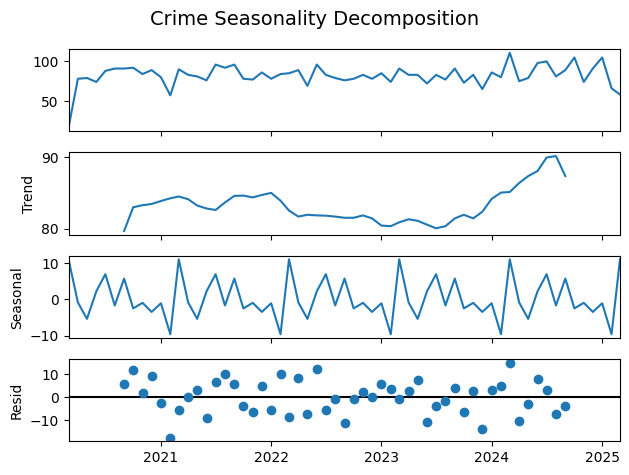

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure datetime index
df['Date'] = pd.to_datetime(df['Date_of_Occurrence'], errors='coerce')
ts = df.groupby(df['Date'].dt.to_period("M")).size()
ts.index = ts.index.to_timestamp()

# Decompose time series
result = seasonal_decompose(ts, model='additive', period=12)

# Plot components
result.plot()
plt.suptitle("Crime Seasonality Decomposition", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# 9. Crime Severity Heatmap by Hour and Severity

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Preview sample time values to detect the correct format
print("Sample time values:")
print(df['Time_of_Occurrence'].dropna().unique()[:10])

# Step 2: Apply format based on your actual time format
# ➤ Change the format below based on the preview:
# Example formats:
#  - "13:45" ➝ "%H:%M"
#  - "13:45:30" ➝ "%H:%M:%S"
#  - "01:45 PM" ➝ "%I:%M %p"

df['Hour'] = pd.to_datetime(df['Time_of_Occurrence'], format='%H:%M', errors='coerce').dt.hour  # update format if needed

# Step 3: Drop NaNs and create pivot table
filtered_df = df.dropna(subset=['Hour', 'Severity_Level'])
pivot = pd.crosstab(filtered_df['Hour'], filtered_df['Severity_Level'])

# Step 4: Plot if data is available
if not pivot.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5, annot=True, fmt="d")
    plt.title("Hourly Crime Count by Severity Level", fontsize=14, weight='bold')
    plt.xlabel("Severity Level", fontsize=12)
    plt.ylabel("Hour of Day", fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("No valid data to plot. Check if 'Time_of_Occurrence' has parsable time values.")


Sample time values:
['20:27:11' '20:01:51' '19:07:04' '02:51:14' '20:54:48' '19:41:02'
 '01:30:12' '13:03:06' '22:57:02' '22:44:41']
No valid data to plot. Check if 'Time_of_Occurrence' has parsable time values.


In [ ]:
# 3. Offender-Victim Pattern Matrix (Demographic Insight)

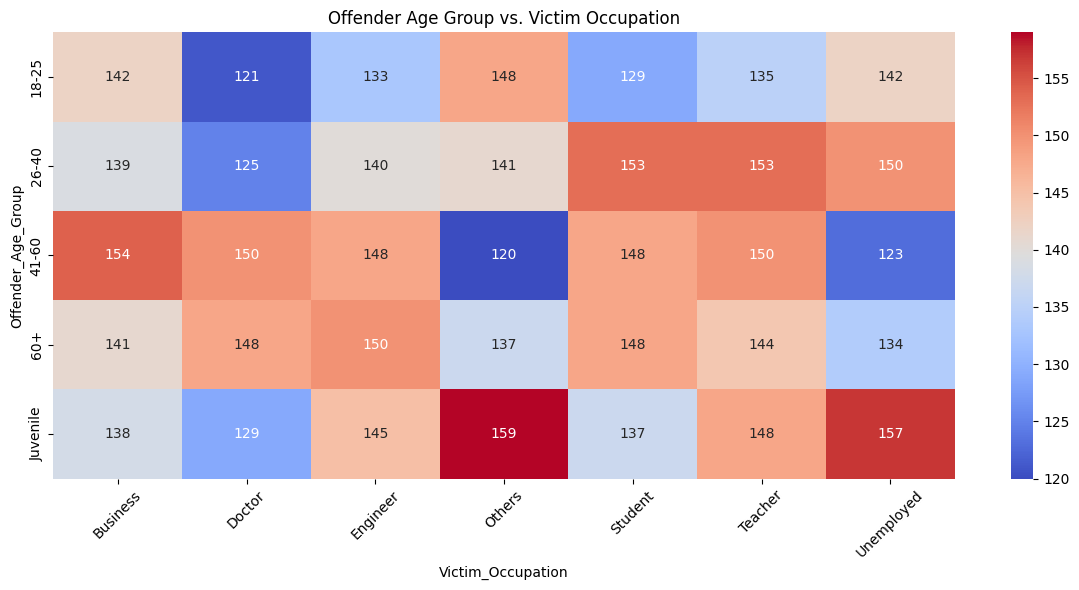

In [38]:
# Create a matrix
matrix = pd.crosstab(df['Offender_Age_Group'], df['Victim_Occupation'])

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(matrix, cmap='coolwarm', annot=True, fmt="d")
plt.title("Offender Age Group vs. Victim Occupation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()